# 1. Loading the library

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('homeprices.csv')
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [4]:
df.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [5]:
# we have one missing value in the bedrooms so will fill it by using median

In [6]:
df.bedrooms.median()

4.0

In [9]:
df=df.fillna(df.bedrooms.median())

In [10]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [11]:
# will start building the model

x=df.loc[:,df.columns!='price']
y=df.loc[:,df.columns=='price']

In [13]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [14]:
model.fit(x,y)

LinearRegression()

In [15]:
# will check how much accuracy it is giving to the train model (to check the overfitting)
y_predtrain=model.predict(x)

In [19]:
y

,price
0,550000
1,565000
2,610000
3,595000
4,760000
5,810000


In [32]:
y_pred=pd.DataFrame(y_predtrain).iloc[:,0]

In [22]:
y.iloc[:,0]

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [24]:
np.arange(0,6)

array([0, 1, 2, 3, 4, 5])

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


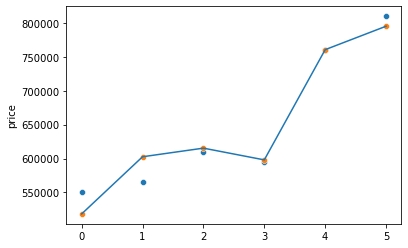

In [35]:
sns.scatterplot(np.arange(0,6),y.iloc[:,0])
sns.scatterplot(np.arange(0,6),y_pred)
plt.plot(np.arange(0,6),y_pred)
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)
print('mse =',mse)
print('rmse =',rmse)

mse = 446305128.2244931
rmse = 21125.934966871715


In [36]:
model.coef_

array([[  112.06244194, 23388.88007794, -3231.71790863]])

In [38]:
model.intercept_

array([221323.0018654])

### Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old

In [43]:
model.predict([[3000,3,40]])

array([[498408.25158031]])

### Find price of home with 2500 sqr ft area, 4 bedrooms, 5 year old

In [44]:
model.predict([[2500,4,5]])

array([[578876.03748933]])

# 

### Exercise
In exercise folder (same level as this notebook on github) there is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

## Questions 

1.)  2 yr experience, 9 test score, 6 interview score

2.)  12 yr experience, 10 test score, 10 interview score

In [49]:
# first will load the data

In [79]:
df=pd.read_csv('Hiring.csv')
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [80]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [81]:
# filling the null values in the experience with 0 year experience
df.experience.fillna('zero',inplace=True)

In [82]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [83]:
df.columns

Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')

In [84]:
# filling the test_score with median of the data 
df['test_score(out of 10)'].median()

8.0

In [85]:
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median(),inplace=True)

In [86]:
df.isnull().sum()

experience                    0
test_score(out of 10)         0
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [87]:
df.experience

0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [88]:
# before building the model will convert the experience has been mentioned in the world will convert in to numeric
# will inport word to number module

In [72]:
pip install word2number

  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5580 sha256=f0512464359eda1a3540216f812cf8e08621cc12d0e497b4174ecd2f4b26cbdb
  Stored in directory: c:\users\jeevan\appdata\local\pip\cache\wheels\a0\4a\5b\d2f2df5c344ddbecb8bea759872c207ea91d93f57fb54e816e
Successfully built word2number
Note: you may need to restart the kernel to use updated packages.


In [95]:
from word2number import w2n
df.experience=df.experience.apply(w2n.word_to_num)

In [96]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
# now will build the model